# Estimate sample phases using ML
- how to slice np array with itk user-selection
- voxel clustering
- super voxel

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import itk
import itkwidgets
from itkwidgets import view, compare

In [6]:
from glob import glob
slices = glob('../images/concrete/*.tiff')
slices.sort()
concrete = itk.imread(slices)
print(itk.size(concrete))
print(itk.spacing(concrete))

itkSize3 ([2560, 2560, 11])
itkVectorD3 ([1, 1, 1])


In [7]:
new_spacing = [1, 1, 1] #change slice thickness
concrete.SetSpacing(new_spacing)

In [8]:
myViewer = view(concrete, mode='z') #slicing over z
myViewer


Viewer(geometries=[], gradient_opacity=0.22, mode='z', point_sets=[], rendered_image=<itkImagePython.itkImageF…

In [19]:
#These are the coordinates of your crop
myViewer.roi_region()


itkImageRegion3([436, 469, 0], [1646, 1766, 11])

In [31]:
# User-selection is input for slicing np array
np_concrete = itk.array_from_image(concrete) 
roi = myViewer.roi_slice()
np_coreSample = np_concrete[roi]
#view(np_coreSample, annotations=False, ui_collapsed=True)

In [33]:
np_coreSample.shape

(11, 1767, 1647)

In [34]:
#np_coreSample = np_coreSample[:,::2,::2] #downsample for quick testing
coreSample = itk.GetImageFromArray(np.ascontiguousarray(np_coreSample))
coreSample = itk.median_image_filter(coreSample)
view(coreSample)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageF3; proxy o…

## Voxel clustering

In [35]:
from scipy import ndimage as ndi
from skimage.morphology import ball
np_coreSample = np_coreSample[:,::2,::2]
aball = ball(radius=2) #3D structure element
median = ndi.median_filter(np_coreSample,footprint=aball)

In [48]:
from sklearn import cluster
x,y,z = np_coreSample.shape
np_coreSampFlat = np_coreSample.reshape(x,y*z)
np_coreSampFlat.shape

(11, 728416)

In [49]:
kmeans_cluster = cluster.KMeans(n_clusters=7)
kmeans_cluster.fit(np_coreSampFlat)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

In [50]:
img_labels = cluster_centers[cluster_labels].reshape(x, y, z)

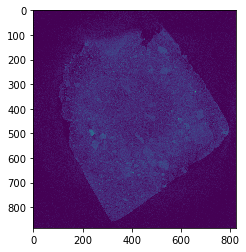

In [60]:
plt.imshow(img_labels[4,:,:],vmin=0,vmax=7)

In [62]:
view(img_labels,annotations=False, vmax=8, ui_collapsed=True)

Viewer(annotations=False, geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.…